<a href="https://colab.research.google.com/github/Venchislav/Neural-Networks/blob/main/MNIST_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GAN in a nutshell:<br>
<img src='https://media1.tenor.com/m/p9_q4Bfmt8YAAAAC/two-people-fighting-fight.gif' width=50%><br>
<img src='https://media1.tenor.com/m/01DMu_oLbOQAAAAd/fighting-fight.gif' width=25%>

Generator tries hard to make good images while discriminator tries hard to classify fake (generated) images and give feedback, helping generator become stronger and better in image generation

In [78]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers.legacy import Adam
import matplotlib.pyplot as plt
import keras
import numpy as np

In [79]:
img_w = 28
img_h = 28
channels = 1

In [80]:
shape_ = (img_w, img_h, channels)

In [81]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

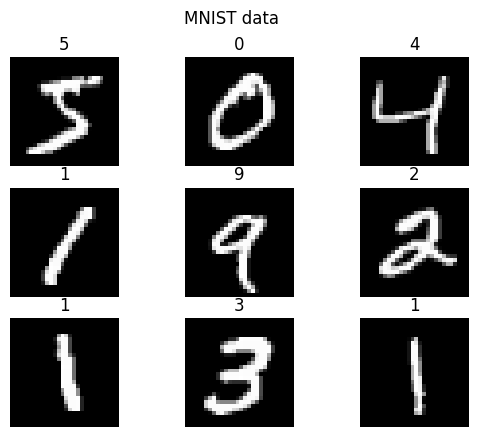

In [82]:
plt.suptitle('MNIST data')
for i in range(9):
  plt.subplot(3, 3, i + 1)
  plt.axis('off')
  plt.title(y_train[i])
  plt.imshow(x_train[i], cmap='gray');

In [83]:
X = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))

In [84]:
assert X.shape[0] == x_train.shape[0] + x_test.shape[0]
assert y.shape[0] == y_train.shape[0] + y_test.shape[0]

In [85]:
from sklearn.utils import shuffle

In [86]:
X, y = shuffle(X, y)

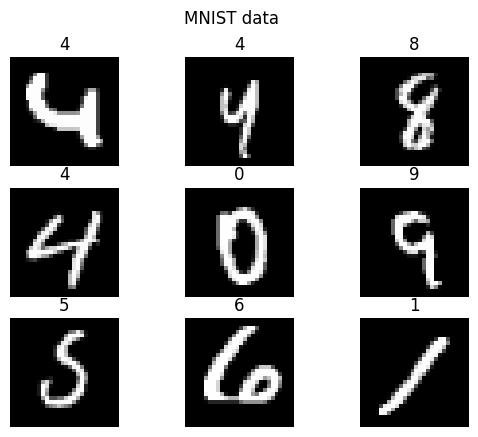

In [87]:
plt.suptitle('MNIST data')
for i in range(9):
  plt.subplot(3, 3, i + 1)
  plt.axis('off')
  plt.title(y[i])
  plt.imshow(X[i], cmap='gray');

In [88]:
def generator_build():
  noise_shape = (100,)

  model = Sequential([
      Dense(256, input_shape=noise_shape),
      LeakyReLU(alpha=0.2),
      BatchNormalization(momentum=0.8),
      Dense(512),
      LeakyReLU(alpha=0.2),
      BatchNormalization(momentum=0.8),
      Dense(1024),
      LeakyReLU(alpha=0.2),
      BatchNormalization(momentum=0.8),

      Dense(np.prod(shape_), activation='tanh'),
      Reshape(shape_)
  ])

  noise = Input(shape=noise_shape)
  img = model(noise)

  return Model(noise, img)

In [89]:
def discriminator_build():
  model = Sequential([
      Flatten(input_shape=shape_),
      Dense(512, activation='relu'),
      LeakyReLU(alpha=0.2),
      Dense(256, activation='relu'),
      LeakyReLU(alpha=0.2),
      Dense(1, activation='sigmoid')
  ])

  img = Input(shape=shape_)
  validity = model(img)

  return Model(img, validity)

In [90]:
def train(epochs, batch_size=128, save_interval=50):

    (X_train, _), (_, _) = mnist.load_data()


    X_train = (X_train.astype(np.float32) - 127.5) / 127.5

    X_train = np.expand_dims(X_train, axis=3)

    half_batch = int(batch_size / 2)
    for epoch in range(epochs):
        idx = np.random.randint(0, X_train.shape[0], half_batch)
        imgs = X_train[idx]


        noise = np.random.normal(0, 1, (half_batch, 100))


        gen_imgs = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(imgs, np.ones((half_batch, 1)))
        d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((half_batch, 1)))

        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
        noise = np.random.normal(0, 1, (batch_size, 100))
        valid_y = np.array([1] * batch_size)
        g_loss = combined.train_on_batch(noise, valid_y)
        print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

        if epoch % save_interval == 0:
            save_imgs(epoch)

In [91]:
def save_imgs(epoch):
  r, c = 5, 5
  noise = np.random.normal(0, 1, (r * c, 100))
  gen_imgs = generator.predict(noise)

  gen_imgs = 0.5 * gen_imgs + 0.5

  fig, axs = plt.subplots(r, c)
  cnt = 0
  for i in range(r):
      for j in range(c):
          axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
          axs[i,j].axis('off')
          cnt += 1
  fig.savefig("images/mnist_%d.png" % epoch)
  plt.close()

In [92]:
optimizer = Adam(0.0002, 0.5)

discriminator = discriminator_build()
discriminator.compile(loss='binary_crossentropy',
                      optimizer=optimizer,
                      metrics=['accuracy'])

In [93]:
generator = generator_build()
generator.compile(
    loss='binary_crossentropy',
    optimizer=optimizer
)

Generator

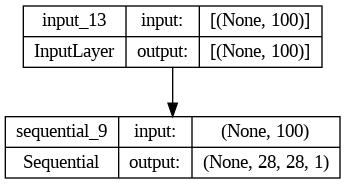

In [94]:
keras.utils.plot_model(generator, show_shapes=True)

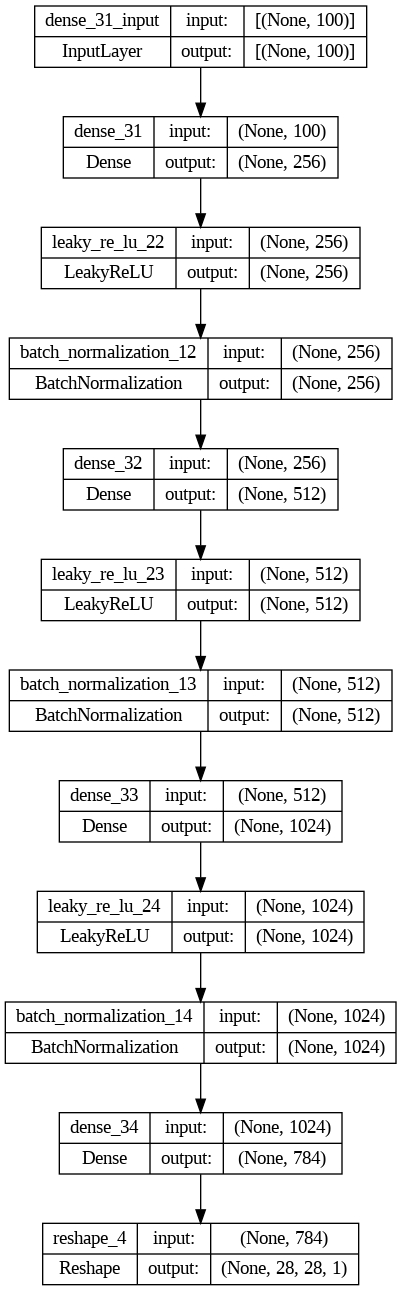

In [95]:
keras.utils.plot_model(generator.layers[1], show_shapes=True)

Discrminator

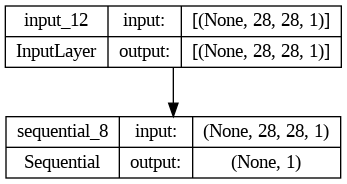

In [96]:
keras.utils.plot_model(discriminator, show_shapes=True)

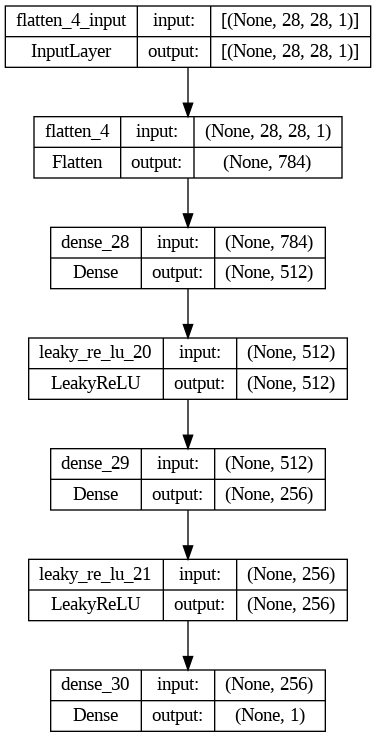

In [97]:
keras.utils.plot_model(discriminator.layers[1], show_shapes=True)

In [98]:
z = Input(shape=(100,))
img = generator(z)
discriminator.trainable = False
valid = discriminator(img)

In [99]:
combined = Model(z, valid)

In [100]:
combined.compile(loss='binary_crossentropy',
                 optimizer=optimizer)

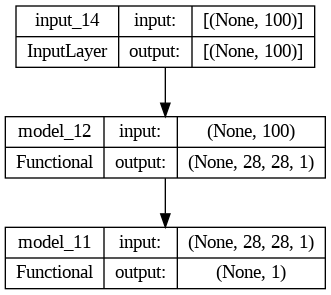

In [101]:
keras.utils.plot_model(combined, show_shapes=True)

In [102]:
train(epochs=100, batch_size=32, save_interval=10)

1/1 [==============================] - 0s 212ms/step
0 [D loss: 0.568491, acc.: 65.62%] [G loss: 0.596890]
1/1 [==============================] - 0s 38ms/step
1 [D loss: 0.379682, acc.: 78.12%] [G loss: 0.635463]
1/1 [==============================] - 0s 69ms/step
2 [D loss: 0.345371, acc.: 84.38%] [G loss: 0.721075]
1/1 [==============================] - 0s 109ms/step
3 [D loss: 0.328873, acc.: 93.75%] [G loss: 0.834767]
1/1 [==============================] - 0s 151ms/step
4 [D loss: 0.300735, acc.: 90.62%] [G loss: 0.990254]
1/1 [==============================] - 0s 133ms/step
5 [D loss: 0.272973, acc.: 96.88%] [G loss: 1.195627]
1/1 [==============================] - 0s 52ms/step
6 [D loss: 0.212985, acc.: 100.00%] [G loss: 1.342559]
1/1 [==============================] - 0s 86ms/step
7 [D loss: 0.181536, acc.: 100.00%] [G loss: 1.537371]
1/1 [==============================] - 0s 40ms/step
8 [D loss: 0.170411, acc.: 100.00%] [G loss: 1.886880]
1/1 [==============================] - 

In [110]:
from numpy.random import randn

In [ ]:
a = randn(100)
a

In [113]:
a = a.reshape(1, 100)
a.shape

(1, 100)

In [114]:
pred = generator.predict(a)

1/1 [==============================] - 0s 22ms/step


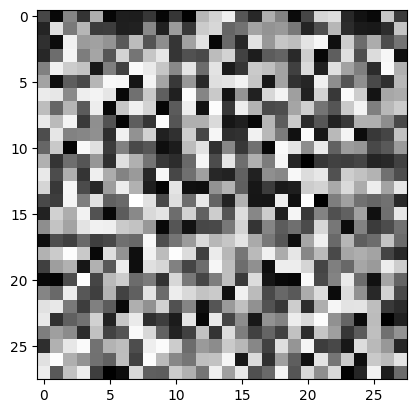

In [115]:
plt.imshow(pred[0], cmap='gray_r')

In [117]:
x = generator.predict(a)

1/1 [==============================] - 0s 34ms/step


<img src='https://media1.tenor.com/m/qFeTzQmw-fgAAAAd/%D0%BA%D1%83%D1%80%D0%B8%D0%BD%D0%B0%D1%8F-%D0%BD%D0%BE%D0%B6%D0%BA%D0%B0-%D0%B8-%D0%BD%D0%B0%D0%B3%D0%B3%D0%B5%D1%82%D1%81-%D0%BF%D0%BE%D1%8E%D1%82.gif'><br>
# **GREAT! This shit doesn't work!**